# OpenCV使用笔记

## opencv使用笔记（一）（图像简单读取、显示与储存）

从去年开始关注python这个软件，途中间间断断看与学过一些关于python的东西，感觉python确实是一个简单优美、容易上手的脚本编程语言，众多的第三方库使得python异常的强大，可以处理许多不同的问题，同时它的许多开源免费的库使得python的使用也是十分的广泛。在科学计算、数据处理与图像领域，自己曾经一直在使用matlab，感觉matlab也是一个语言优美、简单方便的编程语言，都说matlab与python在某些领域是非常相似的，确实是这样，就科学计算、数据处理上真是，matlab中许多科学计算的东西在python中基本上都有对应的库包包含进去，比如numpy，matplotlib等等，这些都是强大而又适用的，但是要说不同，那就是应用层面的了，matlab是一个商业性质的软件，正版软件也是异常的贵，个人感觉属于研究性领域的用的较多，在工作后好像一般都不怎么用这个（可能比较贵的缘故），但是总的来说matlab同样在计算领域是强大无比的。 

Opencv是一个开源的计算机视觉库，从开始研究图像方面，并没有真正接触过它，使用的都是matlab带的图像处理库，现在看来他们很多函数也是那么的神似。但是opencv毕竟是一个专业性的库包，里面的许多函数matlab并没有，并且从其使用面及推广程度上看，opencv确实也是那么强大。所以在图像领域了解opencv（无论是python版本的还是C++版本的）都是必要的，但是对于简单适用的学习者来说，了解了解python版的就足够了。

在读取图像之前，你得把你的做实验的图像事先放到工作目录下才行。读取函数是`cv2.imread()`，关于函数说明： 

```python
retval = cv.imread(filename[, flags])
```

可选参数决定读入图像的模式： 

- *0*：读入的为灰度图像（即使图像为彩色的） 
- *1*：读入的图像为彩色的（默认）； 

*注意的是：即使图像在工作空间不存在，这个函数也不会报错，只不过读入的结果为`None`。*
好了，读入一个图像就是这样的： 

```python
import cv2 
img = cv2.imread('data/lena.jpg') 
```


当你的`import cv2`运行后没有错误了，那么就导入成功了。

### 储存图像

储存图像函数：

```python
retval = cv.imwrite(filename, img[, params])
```

正常的图像储存使用就是`cv.imwrite(filename, img)`，后面一个参数默认，保存的图像名还得带类型，比如jpg，bmp等等，OpenCV目前支持读取bmp、jpg、png、tiff等常用格式，第三个参数较复杂，还得分是jpg、bmp等等图像的类型不同而不同，其实就是决定了图像储存大小，清晰度的，默认的就很好， 
那么在得到一副图像想储存，比如就直接：

```python
cv2.imwrite('good_gray.tif', img)
```

### 图像显示

Opencv自带显示图像函数，但是较为复杂而且个人感觉不稳定，这里在介绍一种显示方法，就是使用库包matplotlib（这个库包Ipython自带）来显示图像。 
首先是opencv自带函数显示，一般要显示一个图像，在图像有了之后，然后直接下面函数一起组合使用：

```python
cv2.imshow('image', img)
cv2.waitKey(0)
cv2.destroyAllWindows()
```

函数`cv2.imshow`的第一个参数是名字，第二个是要显示的图。然而为了让图像在显示屏上停留才有了下面两句话一起使用。由于系统（32位与64位）的不一样，~~有的时候会出现显示不出来，个人感觉opencv本身c语言写的~~，存在着系统上的差异，而且这种显示方法无法保存图像、调整图像大小等等，这里介绍另一种常用且强大的显示图像方法，使用matplotlib库包中的`pyplot`子包来显示，这种显示方法不但稳定，还可以调整大小、保存显示的图像等等。那么一般它的使用方法如下：

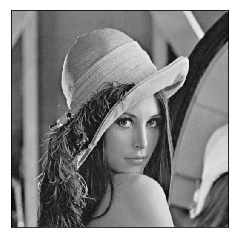

In [67]:
import cv2
from matplotlib import pyplot as plt

img = cv2.imread('data/lena.jpg', 0) # 打开为灰度图像
plt.imshow(img, 'gray')
plt.xticks([]), plt.yticks([])       # 隐藏坐标线 
plt.show()

## opencv使用笔记（二）（简单几何图像绘制）

简单几何图像一般包括点、直线、矩阵、圆、椭圆、多边形等等。首先认识一下opencv对像素点的定义。图像的一个像素点有1或者3个值，对灰度图像有一个灰度值，对彩色图像有3个值组成一个像素值，他们表现出不同的颜色。 
那么有了点才能组成各种多边形。

### （一）首先绘制直线

函数为：

```python
cv2.line(img, pt1, pt2, color, thickness=1, line_type=8, shift=0)
```

- *img* – Image.
- *pt1* – First point of the line segment.
- *pt2* – Second point of the line segment.
- *color* – Line color.
- *thickness* – Line thickness.
- *lineType*–Type of the line:
- `LINE_8 `(or omitted) - 8-connected line.
  - `LINE_4 `- 4-connected line.
- `LINE_AA `- antialiased line.
- *shift* – Number of fractional bits in the point coordinates.  点坐标中位数的个数。

有值的代表有默认值，不用给也行。可以看到这个函数主要接受参数为两个点的坐标，线的颜色（彩色图像的话颜色就是一个1*3的数组）如下：

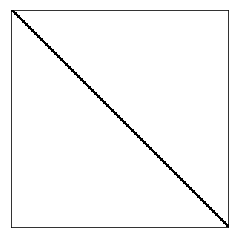

In [68]:
import cv2
import numpy as np
from matplotlib import pyplot as plt

img = np.zeros( (512, 512), np.uint8) + 255
cv2.line(img, (0, 0), (511, 511), 0, 5)
plt.imshow(img, 'gray')
plt.xticks([]), plt.yticks([])
plt.show()

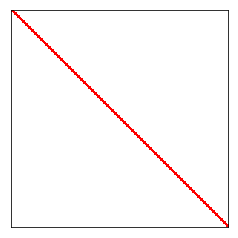

In [69]:
import cv2
import numpy as np
from matplotlib import pyplot as plt

img = np.zeros( (512, 512, 3), np.uint8) + 255
cv2.line(img, (0, 0), (511, 511), (0, 0, 255), 5)
b, g, r = cv2.split(img)
img = cv2.merge([r, g, b])
plt.imshow(img, 'brg')
plt.xticks([]), plt.yticks([])
plt.show()

### （二）绘制矩形

函数：

```python
img	= cv.rectangle(img, pt1, pt2, color, thickness=1, lineType=cv2.LINE_8, shift=0)
```

需要确定的就是矩形的两个点（左上角与右下角），颜色，线的类型（不设置就默认）。 
比如：

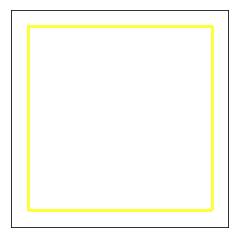

In [70]:
import cv2
import numpy as np
from matplotlib import pyplot as plt

img = np.zeros( (512, 512, 3), np.uint8) + 255
height, width, _ = img.shape
offset = 40
cv2.rectangle(img, (offset, offset), (height-offset, width-offset), 
              (55, 255, 255), 5)

b, g, r = cv2.split(img)
img = cv2.merge([r, g, b])
plt.imshow(img, 'brg')
plt.xticks([]), plt.yticks([])
plt.show()

### 三）绘制圆形

绘制圆形也很简单，只需要确定圆心与半径，

函数：

```python
img = cv2.circle(img, center, radius, color, thickness=1, lineType=cv2.LINE_8, shift=0)
```
比如：

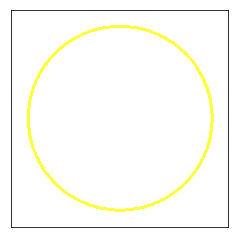

In [79]:
import cv2
import numpy as np
from matplotlib import pyplot as plt

img = np.zeros( (512, 512, 3), np.uint8) + 255
height, width, _ = img.shape
offset = 40
cv2.circle(img, (height//2, width//2), (height+width)//4-offset, (55, 255, 255), 5)

b, g, r = cv2.split(img)
img = cv2.merge([r, g, b])
plt.imshow(img, 'brg')
plt.xticks([]), plt.yticks([])
plt.show()

### （四）绘制椭圆

椭圆比较复杂，涉及到长轴短轴，椭圆圆心

```python
img = cv2.ellipse(img, center, axes, angle, startAngle, 
                  endAngle, color, thickness=1, lineType=cv2.LINE_8, shift=0)

img = cv2.ellipse(img, box, color, thickness=1, lineType=cv2.LINE_8)
```

**Parameters**

- *img* &emsp;&ensp;&ensp;&ensp;&ensp;  &emsp;Image.
- *center*	 &ensp;&ensp;&emsp;&emsp;Center of the ellipse.
- *axes*&emsp; &emsp; &emsp;     Half of the size of the ellipse main axes.
- *angle*	   &emsp;&emsp;&emsp;    Ellipse rotation angle in degrees.
- *startAngle*&emsp;&ensp;Starting angle of the elliptic arc in degrees.
- *endAngle*&emsp; &ensp; Ending angle of the elliptic arc in degrees.

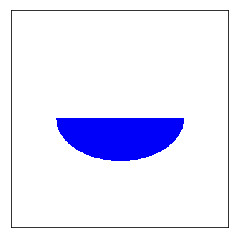

In [72]:
import cv2
import numpy as np
from matplotlib import pyplot as plt

img = np.zeros( (512, 512, 3), np.uint8) + 255
# 注意最后一个参数-1，表示对图像进行填充，默认是不填充的，如果去掉，只有椭圆轮廓了
cv2.ellipse(img=img, center=(256, 256), axes=(150, 100), angle=0,
            startAngle=0, endAngle=180, color=250, thickness=-1)

b, g, r = cv2.split(img)
img = cv2.merge([r, g, b])
plt.imshow(img, 'brg')
plt.xticks([]), plt.yticks([])
plt.show()

## opencv使用笔记（三）（图像的几何变换）

写在之前 
二维与三维图像的几何变换在计算机图形学上有重要的应用，包括现在的许多图像界面的切换、二维与三维游戏画面控制等等都涉及到图像几何变换，就比如说在三维游戏中，控制角色三维移动的时候，画面是要跟着移动的，那么怎么移动，怎么让上一时刻的画面移动到这一时刻，这都是根据了你的移动量，然后找到三维坐标之间的对应关系，用这一时刻的坐标替换到上一时刻的坐标像素值实现图像的切换。

图像的几何变换主要包括：**平移、扩大与缩小、旋转、仿射、透视**等等。图像变换是建立在矩阵运算基础上的，通过矩阵运算可以很快的找到对应关系。理解变换的原理需要理解变换的构造方法以及矩阵的运算方法，曾经写过matlab下的简单图像变换原理，里面有最基础的构造原理可以看看：

[**matlab之原始处理图像几何变换**](http://blog.csdn.net/on2way/article/details/40460675)

### （一）图像的平移

下面介绍的图像操作假设你已经知道了为什么需要用矩阵构造才能实现了（上面那个博客有介绍为什么）。那么关于偏移很简单，图像的平移，沿着$x$方向$t_x$距离，$y$方向$t_y$距离，那么需要构造移动矩阵： 
$$
M = \begin{bmatrix}
1 & 0 & t_x\\
0& 1 & t_y 
\end{bmatrix}
$$
通过`numpy`来产生这个矩阵，并将其赋值给仿射函数`cv2.warpAffine()`. 

仿射函数`cv2.warpAffine()`接受三个参数，需要变换的原始图像，移动矩阵$M$ 以及变换的图像大小（这个大小如果不和原始图像大小相同，那么函数会自动通过插值来调整像素间的关系）。 

```python
dst = cv2.warpAffine(src, M, dsize[, dst[, flags[, borderMode[, borderValue]]]])
```

**Parameters**

- *src* &ensp;input image.
- *dst* &ensp;output image that has the size dsize and the same type as src .
- *M* &ensp;$2×3$ transformation matrix.
- *dsize*&ensp; size of the output image.
- *flags*&ensp; combination of interpolation methods (see `InterpolationFlags`) and the optional flag `WARP_INVERSE_MAP`that means that M is the inverse transformation ( *dst*→*src* ).
- *borderMode*&ensp; pixel extrapolation method (see `BorderTypes`); when `borderMode=BORDER_TRANSPARENT`, it means that the pixels in the destination image corresponding to the "outliers" in the source image are not modified by the function.
- *borderValue*&ensp; value used in case of a constant border; by default, it is 0.

The function **warpAffine transforms** the source image using the specified matrix:
$$
\texttt{dst} (x,y) =  \texttt{src} ( \texttt{M} _{11} x +  \texttt{M} _{12} y +  \texttt{M} _{13}, \texttt{M} _{21} x +  \texttt{M} _{22} y +  \texttt{M} _{23})
$$
一个例子如下：

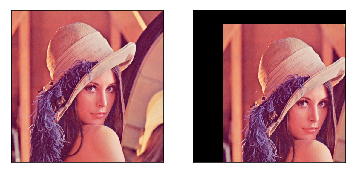

In [73]:
import cv2
import numpy as np
from matplotlib import pyplot as plt

img = cv2.imread('data/lena.jpg')
H = np.float32([[1, 0, 100], [0, 1, 50]])
rows, cols = img.shape[:2]
res = cv2.warpAffine(img,H,(cols,rows)) #需要图像、变换矩阵、变换后的大小

plt.subplot(121)
b, g, r = cv2.split(img)
img = cv2.merge([r, g, b])
plt.imshow(img)
plt.xticks([]), plt.yticks([])

plt.subplot(122)
b, g, r = cv2.split(res)
res = cv2.merge([r, g, b])
plt.imshow(res)
plt.xticks([]), plt.yticks([])

plt.show()

### （二）图像的扩大与缩小

图像的扩大与缩小有专门的一个函数，`cv2.resize()`，那么关于伸缩需要确定的就是缩放比例，可以是$x$与$y$方向相同倍数，也可以单独设置$x$与$y$的缩放比例。另外一个就是在缩放以后图像必然就会变化，这就又涉及到一个插值问题。那么这个函数中，缩放有几种不同的插值（`interpolation`）方法，在缩小时推荐`cv2.INTER_ARER`,扩大是推荐`cv2.INTER_CUBIC`和`cv2.INTER_LINEAR`。默认都是`cv2.INTER_LINEAR`，比如：

```python
 dst = cv2.resize(src, dsize[, dst[, fx[, fy[, interpolation]]]])
```

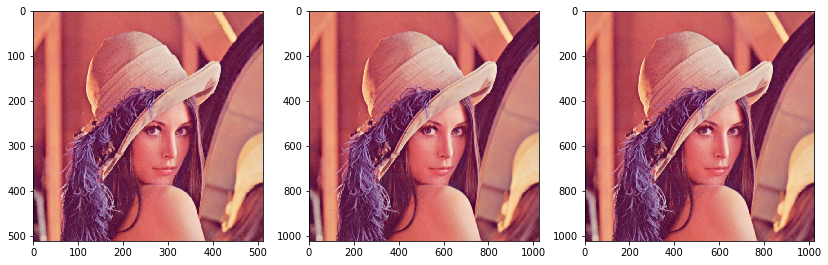

In [81]:
import cv2
import numpy as np
from matplotlib import pyplot as plt

img = cv2.imread('data/lena.jpg')
# 插值：interpolation
# None本应该是放图像大小的位置的，后面设置了缩放比例，所以就不要了
res1 = cv2.resize(img, None, fx=2, fy=2, interpolation=cv2.INTER_CUBIC)

# 直接规定缩放大小，这个时候就不需要缩放因子
height, width = img.shape[:2]
res2 = cv2.resize(img, (2*width, 2*height), interpolation=cv2.INTER_CUBIC)
plt.figure(figsize=(14, 10))
for subfig, image in zip([131, 132, 133], [img, res1, res2]):
    plt.subplot(subfig)
    b, g, r = cv2.split(image)
    image = cv2.merge([r, g, b])
    plt.imshow(image)

plt.show()

通过坐标轴可以看到图像扩大了一倍，并且两种方法相同。

### （三）图像的旋转

图像的旋转矩阵一般为： 
$$
M=\begin{bmatrix}
cos(\theta)&-sin(\theta)\\
sin(\theta)&cos(\theta)
\end{bmatrix}
$$

但是单纯的这个矩阵是在原点处进行变换的，为了能够在任意位置进行旋转变换，opencv采用了另一种方式： 

$$
M=\begin{bmatrix}
\alpha&-\beta&(1-\alpha)center_x-\beta center_y\\
-\beta &alpha&\beta center_x +(1-\alpha)center_y\\
\end{bmatrix}
$$
where
- $\alpha=scale.cos(angle)$
- $\beta = scale.sin(angle)$

为了构造这个矩阵，opencv提供了一个函数：` cv2.getRotationMatrix2D()`，这个函数需要三个参数，旋转中心，旋转角度，旋转后图像的缩放比例，

```python
retval = cv2.getRotationMatrix2D(center, angle, scale)
```

比如下例：

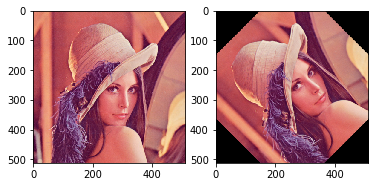

In [89]:
import cv2
import numpy as np
from matplotlib import pyplot as plt

img = cv2.imread('data/lena.jpg')
rows, cols = img.shape[:2]

# 第一个参数旋转中心，第二个参数旋转角度，第三个参数：缩放比例
M = cv2.getRotationMatrix2D((cols/2, rows/2), 45, 1)
# 第三个参数：变换后的图像大小
res = cv2.warpAffine(img, M, (rows, cols))

for subfig, image in zip([121, 122], [img, res]):
    plt.subplot(subfig)
    b, g, r = cv2.split(image)
    image = cv2.merge([r, g, b])
    plt.imshow(image)

plt.show()

### 四）图像的仿射

**图像的旋转加上拉升就是图像仿射变换**，仿射变化也是需要一个$M$矩阵就可以，但是由于仿射变换比较复杂，一般直接找很难找到这个矩阵，opencv提供了根据变换前后三个点的对应关系来自动求解$M$。这个函数是 

```python
M = cv2.getAffineTransform(pos1, pos2)
```

其中两个位置就是变换前后的对应位置关系。输出的就是仿射矩阵$M$。然后在使用函数`cv2.warpAffine()`。形象化的图如下（引用参考的） 

![这里写图片描述](graph/20150708111543898)

一个例子比如：

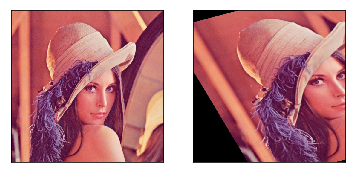

In [91]:
import cv2
import numpy as np
from matplotlib import pyplot as plt

img = cv2.imread('data/lena.jpg')
rows, cols = img.shape[:2]

# 需要源图像和变换后三个点的坐标
pts1 = np.float32([ [50, 50], [200, 50], [50, 200]])
pts2 = np.float32([ [10, 100], [200, 50], [100, 250]])
M = cv2.getAffineTransform(pts1, pts2)
res = cv2.warpAffine(img, M, (rows,cols))

for subfig, image in zip([121, 122], [img, res]):
    plt.subplot(subfig)
    b, g, r = cv2.split(image)
    image = cv2.merge([r, g, b])
    plt.imshow(image)
    plt.xticks([]), plt.yticks([])

plt.show()

###  （ 五）图像的透射

透视需要的是一个$3\times 3$的矩阵，同理opencv在构造这个矩阵的时候还是采用一种点对应的关系来通过函数自己寻找的，因为我们自己很难计算出来。这个函数是

```python
M = cv2.getPerspectiveTransform(pts1,pts2)
```

*Calculates a perspective transform from four pairs of the corresponding points*

其中pts需要变换前后的$4$个点对应位置。得到$M$后在通过函数`cv2.warpPerspective(img,M,(200,200))`进行。形象化的图如下（引用参考的） 
![这里写图片描述](graph/20150708111655043) 

一个例子如下：

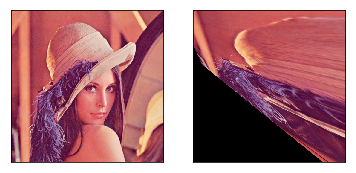

In [98]:
import cv2
import numpy as np
from matplotlib import pyplot as plt

img = cv2.imread('data/lena.jpg')
rows, cols = img.shape[:2]

# 需要源图像和变换后三个点的坐标
pts1 = np.float32([[56, 65], [138, 52], [28, 237], [139, 240]])
pts2 = np.float32([[0, 0], [200, 0], [10, 100], [200, 200]])
M = cv2.getPerspectiveTransform(pts1, pts2)
res = cv2.warpPerspective(img, M, (rows, cols))

for subfig, image in zip([121, 122], [img, res]):
    plt.subplot(subfig)
    b, g, r = cv2.split(image)
    image = cv2.merge([r, g, b])
    plt.imshow(image)
    plt.xticks([]), plt.yticks([])

plt.show()

## opencv使用笔记（四）（图像的阈值处理）

图像的阈值处理一般使得图像的像素值更单一、图像更简单。阈值可以分为全局性质的阈值，也可以分为局部性质的阈值，可以是单阈值的也可以是多阈值的。当然阈值越多是越复杂的。下面将介绍opencv下的三种阈值方法。

###  （ 一）简单阈值

简单阈值当然是最简单，选取一个全局阈值，然后就把整幅图像分成了非黑即白的二值图像了。函数为`cv2.threshold() `
这个函数有四个参数，第一个原图像，第二个进行分类的阈值，第三个是高于（低于）阈值时赋予的新值，第四个是一个方法选择参数，常用的有： 

- `cv2.THRESH_BINARY`（黑白二值） 
- `cv2.THRESH_BINARY_INV`（黑白二值反转） 
-  `cv2.THRESH_TRUNC` （得到的图像为多像素值） 
-  `cv2.THRESH_TOZERO` 
- `cv2.THRESH_TOZERO_INV` 

该函数有两个返回值，第一个`retVal`（得到的阈值值（在后面一个方法中会用到）），第二个就是阈值化后的图像。 

###  threshold

Applies a fixed-level threshold to each array element.

```python
cv2.threshold(src, thresh, maxval, type[, dst]) → retval, dst
```

**Parameters:**

- **src** – input array (single-channel, 8-bit or 32-bit floating point).  
- **dst** – output array of the same size and type as `src`.  
- **thresh** – threshold value.  
- **maxval** – maximum value to use with the `THRESH_BINARY` and `THRESH_BINARY_INV` thresholding types.
- **type** – thresholding type (see the details below).  

The function applies fixed-level thresholding to a single-channel array. The function is typically used to get a bi-level (binary) image out of a grayscale image ( `compare()` could be also used for this purpose) or **for removing a noise**, that is, **filtering out pixels with too small or too large values.** There are several types of thresholding supported by the function. They are determined by `type` :

- **THRESH_BINARY**
![](https://docs.opencv.org/3.0-beta/_images/math/21dfc802899546a3a9a51794d241330e6377f032.png)

- **THRESH_BINARY_INV**

![\texttt{dst} (x,y) =  \fork{0}{if $\texttt{src}(x,y) > \texttt{thresh}$}{\texttt{maxval}}{otherwise}](https://docs.opencv.org/3.0-beta/_images/math/2858653b2a9f18e326acd861f4f23476f918e52b.png)

- **THRESH_TRUNC**

![\texttt{dst} (x,y) =  \fork{\texttt{threshold}}{if $\texttt{src}(x,y) > \texttt{thresh}$}{\texttt{src}(x,y)}{otherwise}](https://docs.opencv.org/3.0-beta/_images/math/85cd5dfea2f25f50640e7555c4019829859ff661.png)

- **THRESH_TOZERO**

![\texttt{dst} (x,y) =  \fork{\texttt{src}(x,y)}{if $\texttt{src}(x,y) > \texttt{thresh}$}{0}{otherwise}](https://docs.opencv.org/3.0-beta/_images/math/c42e93ea5c713fb2fca2605fa03ccbdf15a98d16.png)

- **THRESH_TOZERO_INV**

![\texttt{dst} (x,y) =  \fork{0}{if $\texttt{src}(x,y) > \texttt{thresh}$}{\texttt{src}(x,y)}{otherwise}](https://docs.opencv.org/3.0-beta/_images/math/6729a7b61fa189e9ad1a365aa5eb9290b70b023e.png)

also, the special values `THRESH_OTSU` or `THRESH_TRIANGLE` may be combined with one of the above values. In these cases, the function determines the optimal threshold value using the Otsu’s or Triangle algorithm and uses it instead of the specified `thresh` . The function returns the computed threshold value. Currently, the `Otsu's` and `Triangle` methods are implemented only for 8-bit images.

![../../../_images/threshold.png](https://docs.opencv.org/3.0-beta/_images/threshold.png)

一个实例如下：

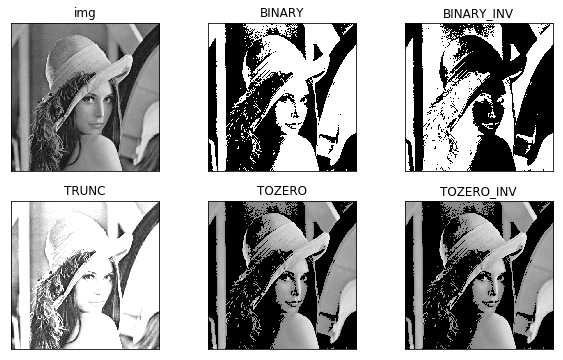

In [107]:
import cv2
import numpy as np
from matplotlib import pyplot as plt

img = cv2.imread('data/lena.jpg', 0)

_, thresh1 = cv2.threshold(img, 127, 255, cv2.THRESH_BINARY)
_, thresh2 = cv2.threshold(img, 127, 255, cv2.THRESH_BINARY_INV)
_, thresh3 = cv2.threshold(img, 127, 255, cv2.THRESH_TRUNC)
_, thresh4 = cv2.threshold(img, 127, 255, cv2.THRESH_TOZERO)
_, thresh5 = cv2.threshold(img, 127, 255, cv2.THRESH_TOZERO)

titles = ['img', 'BINARY', 'BINARY_INV', 'TRUNC', 'TOZERO', 'TOZERO_INV']
images = [img, thresh1, thresh2, thresh3, thresh4, thresh5]

plt.figure(figsize=(10,6))
for i in range(6):
    plt.subplot(2, 3, i+1)
    plt.imshow(images[i], 'gray')
    plt.title(titles[i])
    plt.xticks([]), plt.yticks([])

plt.show()

可以看到这里把阈值设置成了$127$，对于`BINARY`方法，当图像中的灰度值大于$127$的重置像素值为$255$.

###  （二）自适应阈值：

前面看到简单阈值是一种全局性的阈值，只需要规定一个阈值值，整个图像都和这个阈值比较。而自适应阈值可以看成一种局部性的阈值，通过规定一个区域大小，比较这个点与区域大小里面像素点的平均值（或者其他特征）的大小关系来确定这个像素点是属于黑或者白（如果是二值情况）。使用的函数为：

```python
cv2.adaptiveThreshold(src, maxValue, adaptiveMethod, thresholdType, blockSize, C[, dst]) -> dst
```

该函数需要填6个参数：

- 第一个原始图像
- 第二个像素值上限
- 第三个自适应方法Adaptive Method: 
  - `cv2.ADAPTIVE_THRESH_MEAN_C` ：领域内均值 
  - `cv2.ADAPTIVE_THRESH_GAUSSIAN_C` ：领域内像素点加权和，权重为一个高斯窗口
- 第四个值的赋值方法：只有`cv2.THRESH_BINARY` 和`cv2.THRESH_BINARY_INV`
- 第五个*Blocksize*：规定领域大小（一个正方形的领域）
- 第六个常数*C*，阈值等于均值或者加权值减去这个常数（为0相当于阈值 就是求得领域内均值或者加权值） 
  这种方法理论上得到的效果更好，相当于在动态自适应的调整属于自己像素点的阈值，而不是整幅图像都用一个阈值。

Applies an adaptive threshold to an array.

- **src** – **Source 8-bit single-channel image.**

- **dst** – Destination image of the same size and the same type as `src` .  

- **maxValue** – Non-zero value assigned to the pixels for which the condition is satisfied. See the details below.  

- **adaptiveMethod** – Adaptive thresholding algorithm to use, `ADAPTIVE_THRESH_MEAN_C` or`ADAPTIVE_THRESH_GAUSSIAN_C` . See the details below.  

- **thresholdType** – Thresholding type that must be either `THRESH_BINARY` or `THRESH_BINARY_INV`
-  **blockSize** – Size of a pixel neighborhood that is used to calculate a threshold value for the pixel: $3$, $5$, $7$, and so on.  

- **C** – Constant subtracted from the mean or weighted mean (see the details below). Normally, it is positive but may be zero or negative as well. 

The function transforms a *grayscale* image to a binary image according to the formulae:

- **THRESH_BINARY**

![dst(x,y) =  \fork{\texttt{maxValue}}{if $src(x,y) > T(x,y)$}{0}{otherwise}](https://docs.opencv.org/3.0-beta/_images/math/7df8e198374f12e5e28ff32b34d49ecb2fbdddb4.png)

- **THRESH_BINARY_INV**

![dst(x,y) =  \fork{0}{if $src(x,y) > T(x,y)$}{\texttt{maxValue}}{otherwise}](https://docs.opencv.org/3.0-beta/_images/math/59b5b25f1acebef583c96c77c49354b22f871560.png)

where $T(x,y)$ is a threshold calculated individually for each pixel.

- For the method `ADAPTIVE_THRESH_MEAN_C` , the threshold value $T(x,y)$ is a mean of the $\texttt{blockSize} \times \texttt{blockSize}$ neighborhood of $(x, y)$ minus $C$ .
- For the method `ADAPTIVE_THRESH_GAUSSIAN_C` , the threshold value $T(x, y)$ is a weighted sum (cross-correlation with a Gaussian window) of the $\texttt{blockSize} \times \texttt{blockSize}$ neighborhood of $(x, y)$ minus $C$ . The default sigma (standard deviation) is used for the specified `blockSize` . 

一个实例如下：

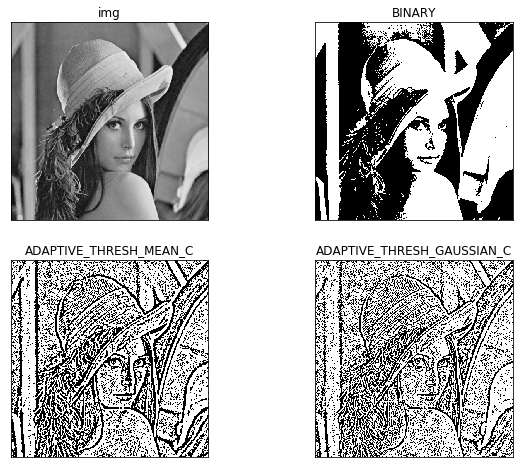

In [118]:
import cv2
import numpy as np
from matplotlib import pyplot as plt

img = cv2.imread('data/lena.jpg', 0)

_, thresh1 = cv2.threshold(img, 127, 255, cv2.THRESH_BINARY)
thresh2 = cv2.adaptiveThreshold(img, 255, cv2.ADAPTIVE_THRESH_MEAN_C, 
                                   cv2.THRESH_BINARY, 11, 2)
thresh3 = cv2.adaptiveThreshold(img, 255, cv2.ADAPTIVE_THRESH_GAUSSIAN_C, 
                                   cv2.THRESH_BINARY, 11, 2)

titles = ['img', 'BINARY', 'ADAPTIVE_THRESH_MEAN_C', 'ADAPTIVE_THRESH_GAUSSIAN_C']
images = [img, thresh1, thresh2, thresh3]

plt.figure(figsize=(10, 8))
for i in range(4):
    plt.subplot(2, 2, i+1)
    plt.imshow(images[i], 'gray')
    plt.title(titles[i])
    plt.xticks([]), plt.yticks([])

plt.show()

可以看到上述窗口大小使用的为11，当窗口越小的时候，得到的图像越细。想想一下，如果把窗口设置足够大以后（不能超过图像大小），那么得到的结果可能就和第二幅图像的相同了。

###  三）Otsu’s二值化

我们前面说到，`cv2.threshold`函数是有两个返回值的，前面一直用的第二个返回值，也就是阈值处理后的图像，那么第一个返回值（得到图像的阈值）将会在这里用到。 
前面对于阈值的处理上，我们选择的阈值都是$127$，那么实际情况下，怎么去选择这个$127$呢？有的图像可能阈值不是$127$得到的效果更好。那么这里我们需要算法自己去寻找到一个阈值，而Otsu’s就可以自己找到一个认为最好的阈值。并且Otsu’s非常适合于图像灰度直方图具有**双峰**的情况，他会在双峰之间找到一个值作为阈值，对于非双峰图像，可能并不是很好用。那么经过Otsu’s得到的那个阈值就是函数`cv2.threshold`的第一个参数了。因为Otsu’s方法会产生一个阈值，那么函数`cv2.threshold`的第二个参数（设置阈值）就是$0$了，并且在`cv2.threshold`的方法参数中还得加上语句`cv2.THRESH_OTSU`。那么什么是双峰图像（只能是灰度图像才有），就是图像的灰度统计图中可以明显看出只有两个波峰，比如下面一个图的灰度直方图就可以是双峰图： 

<img src="graph/20150709090157285" alt="这里写图片描述" style="zoom:50%;" />



好了现在对这个图进行Otsu’s阈值处理就非常的好，通过函数`cv2.threshold`会自动找到一个介于两波峰之间的阈值。一个实例如下：

131.0


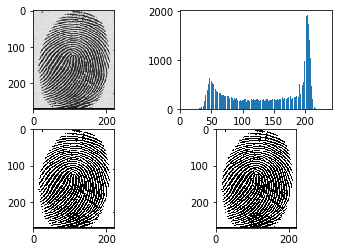

In [125]:
import cv2
import numpy as np
from matplotlib import pyplot as plt

img = cv2.imread('data/finger.png', 0)
# 简单滤波
ret1, thresh1 = cv2.threshold(img, 127, 255, cv2.THRESH_BINARY)

# Otsu 滤波
ret2, thresh2 = cv2.threshold(img, 0, 255, cv2.THRESH_BINARY+cv2.THRESH_OTSU)

print(ret2)
plt.figure()
plt.subplot(221), plt.imshow(img,'gray')
plt.subplot(222), plt.hist(img.ravel(),256)
plt.subplot(223), plt.imshow(thresh1,'gray')
plt.subplot(224), plt.imshow(thresh2,'gray')
plt.show()

`print(ret2)` 得到的结果为122。可以看出似乎两个结果并没有很明显差别（素材也不太好弄~_~!），主要是两个阈值（127与122）太相近了，如果这两个隔得很远那么会很明显的

## opencv使用笔记（五）（图像的平滑与滤波）

对于图形的平滑与滤波，但从滤波角度来讲，一般主要的目的都是为了实现对图像噪声的消除，增强图像的效果。 
首先介绍二维卷积运算，图像的滤波可以看成是滤波模板与原始图像对应部分的的卷积运算。关于卷积运算，找到几篇相关的博客：

- [图像处理：基础(模板、卷积运算)](http://blog.csdn.net/xiaoxin_ling/article/details/3587987)
- [图像处理-模板、卷积的整理](http://blog.csdn.net/lanbing510/article/details/7425952)

对于2D图像可以进行低通或者高通滤波操作

- 低通滤波（`LPF`）有利于去噪，模糊图像
- 高通滤波（`HPF`）有利于找到图像边界。

### （一）统一的2D滤波器cv2.filter2D

Opencv提供的一个通用的2D滤波函数为`cv2.filter2D()`，滤波函数的使用需要一个核模板，对图像的滤波操作过程为：将和模板放在图像的一个像素$A$上，求与之对应的图像上的每个像素点的和，核不同，得到的结果不同，而滤波的使用核心也是对于这个核模板的使用，需要注意的是，该滤波函数是单通道运算的，也就是说对于彩色图像的滤波，需要将彩色图像的各个通道提取出来，对各个通道分别滤波才行。 
这里说一个与matlab相似的情况，matlab中也有一个类似的滤波函数`imfilter`，对于滤波函数的应用其实不只在于滤波，对于许多图像的整体处理上，其实都可以用滤波函数来组合实现，得到更快的效果，相关的介绍间下面这个博客：

**[图像滤波函数imfilter函数的应用及其扩展]()**

 **filter2D**

Convolves an image with the kernel.

```python
cv2.filter2D(src, ddepth, kernel[, dst[, anchor[, delta[, borderType]]]]) -> dst
```

Parameters:  

- **src** – input image.  

- **dst** – output image of the same size and the same number of channels as `src`.  

- **ddepth** –desired depth of the destination image; if it is negative, it will be the same as `src.depth()`; the following combinations of `src.depth()` and `ddepth` are supported:

  - `src.depth() = CV_8U, ddepth= -1/CV_16S/CV_32F/CV_64F`
  - `src.depth()= CV_16U/CV_16S, ddepth = -1/CV_32F/CV_64F`
  - `src.depth() = CV_32F, ddepth = -1/CV_32F/CV_64F`
  - `src.depth() = CV_64F, ddepth= -1/CV_64F`

  when `ddepth=-1`, the output image will have the same depth as the source. 

- **kernel** – convolution kernel (or rather a correlation kernel), a single-channel floating point matrix; if you want to apply different kernels to different channels, split the image into separate color planes using `split()` and process them individually. 
- **anchor** – anchor of the kernel that indicates the relative position of a filtered point within the kernel; the anchor should lie within the kernel; default value (-1,-1) means that the anchor is at the kernel center.
- **delta** – optional value added to the filtered pixels before storing them in `dst`.
- **borderType** – pixel extrapolation method (see `borderInterpolate` for details). 

The function applies an arbitrary linear filter to an image. In-place operation is supported. When the aperture is partially outside the image, the function interpolates outlier pixel values according to the specified border mode.

The function does actually compute correlation, not the convolution:
$$
\texttt{dst} (x,y) =  \sum _{ \stackrel{0\leq x' < \texttt{kernel.cols},}{0\leq y' < \texttt{kernel.rows}} }  \texttt{kernel} (x',y')* \texttt{src} (x+x'- \texttt{anchor.x} ,y+y'- \texttt{anchor.y} )
$$
That is, the kernel is not mirrored around the anchor point. If you need a real convolution, flip the kernel using `flip()` and set the new anchor to `(kernel.cols - anchor.x - 1, kernel.rows - anchor.y - 1)` .

The function uses the DFT-based algorithm in case of sufficiently large kernels (~$11 \times 11$ or larger) and the direct algorithm for small kernels.

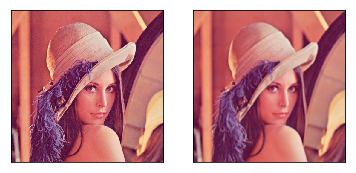

In [127]:
import cv2
import numpy as np
from matplotlib import pyplot as plt

img = cv2.imread('data/lena.jpg')
kernel = np.ones((5,5), np.float32) / 25

# cv2.filter2D(src, dst, kernel, auchor=(-1,-1))函数：
# 输出图像与输入图像大小相同,中间的数为-1，表示输出数值格式的相同
dst = cv2.filter2D(img, -1, kernel)

images = [img, dst]
for i in range(2):
    plt.subplot(1, 2, i+1)
    b, g, r = cv2.split(images[i])
    image = cv2.merge([r, g, b])
    plt.imshow(image)
    plt.xticks([]), plt.yticks([])

plt.show()

具体化，重新规定一个名字而已，贴一个好的博客参考：

[图像平滑处理（归一化块滤波、高斯滤波、中值滤波、双边滤波）](http://blog.csdn.net/xw20084898/article/details/21822565)